In [72]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus) #어절 단위, 구두점 분위
print(len(tokens))

191785


In [73]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

In [74]:
#bigram.ngram_fd.items() #Emma 소설, 이웃한 쌍끼리 / 빈도수
#type(bigram.ngram_fd)
bigram.ngram_fd.most_common(10)
bigram.nbest(BigramAssocMeasures.pmi, 10) #frequency가 아닌 연관성을 가진 쌍
#=> 깨끗하게 정제된(품사) 단어 쌍(("형태소", "품사"), "형태소", "품사")
from nltk import pos_tag
from string import punctuation
from nltk.corpus import stopwords
import re

stopwords = stopwords.open("english").read()
pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
tokens = [_ for _ in tokens if not pattern.search(_)]
print(len(tokens))

157052


In [75]:
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

([((',', 'and'), 1880),
  (('.', "''"), 1157),
  (("''", '``'), 959),
  ((';', 'and'), 867),
  (('to', 'be'), 593),
  ((',', "''"), 584),
  (('.', 'I'), 570),
  ((',', 'I'), 569),
  (('of', 'the'), 556),
  (('in', 'the'), 434)],
 [('26th', 'ult.'),
  ('Abominable', 'scoundrel'),
  ('Agricultural', 'Reports'),
  ('Austen', '1816'),
  ('Baronne', "d'Almane"),
  ('Candles', 'everywhere.'),
  ('Clayton', 'Park'),
  ('Comtesse', "d'Ostalis"),
  ('DEAR', 'MADAM'),
  ('Farmer', 'Mitchell')])

In [81]:
#(형태소, 품사)
tokens = [_ for _ in pos_tag(tokens) if not pattern.search(_[0])]

In [77]:
len(tokens)

157052

In [78]:
tokens = [_[0] for _ in tokens]

In [82]:
tokens = [_[1] for _ in tokens]

In [83]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

([(('DT', 'NN'), 6540),
  (('NN', 'IN'), 5947),
  (('IN', 'DT'), 4590),
  (('PRP', 'VBD'), 4055),
  (('JJ', 'NN'), 3630),
  (('TO', 'VB'), 3404),
  (('IN', 'PRP'), 3326),
  (('MD', 'VB'), 2697),
  (('DT', 'JJ'), 2625),
  (('PRP', 'VBP'), 2613)],
 [('UH', 'UH'),
  ('NNPS', 'WP'),
  ('FW', 'NNP'),
  ('NNP', 'FW'),
  ('EX', 'VBZ'),
  ('WP$', 'NNS'),
  ('RBS', 'JJ'),
  ('TO', 'VB'),
  ('PDT', 'DT'),
  ('CD', 'NNS')])

In [85]:
from konlpy.corpus import kolaw
from konlpy.tag import Komoran

corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)

In [86]:
len(tokens)
bigram = BigramCollocationFinder.from_words(tokens)
bigram.ngram_fd.most_common(10)
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

[("''", '제70조'),
 ('12일에', '제정되고'),
 ('1948년', '7월'),
 ('1987.10.29.', '>'),
 ('1988년', '2월'),
 ('1인과', '부의장'),
 ('1회', '집회되며'),
 ('200인', '이상으로'),
 ('20일을', '경과함으로써'),
 ('25일부터', '시행한다')]

In [47]:
ma = Komoran().pos
pos = list()
for _ in tokens:
    if not pattern.search(_):
        pos.extend(ma(_))

In [48]:
len(tokens), len(pos)

(4640, 9337)

In [51]:
bigram = BigramCollocationFinder.from_words(pos)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

([((('ㄴ다', 'EC'), ('제', 'XPN')), 89),
  ((('에', 'JKB'), ('의하', 'VV')), 83),
  ((('ㄹ', 'ETM'), ('수', 'NNB')), 79),
  ((('조', 'NR'), ('①', 'SW')), 78),
  ((('하', 'XSV'), ('ㄹ', 'ETM')), 76),
  ((('의하', 'VV'), ('아', 'EC')), 66),
  ((('수', 'NNB'), ('있', 'VV')), 64),
  ((('하', 'XSV'), ('ㄴ다', 'EC')), 58),
  ((('법률', 'NNG'), ('이', 'JKS')), 57),
  ((('이', 'JKS'), ('정하', 'VV')), 57)],
 [(('가부', 'NNP'), ('동수', 'NNP')),
  (('강제', 'NNG'), ('노역', 'NNG')),
  (('경자', 'NNP'), ('유전', 'NNP')),
  (('교전', 'NNG'), ('상태', 'NNG')),
  (('국립', 'NNP'), ('대학교', 'NNG')),
  (('군', 'NNB'), ('참모총장', 'NNP')),
  (('군용', 'NNG'), ('물', 'NNG')),
  (('궐위되거나', 'NA'), ('사고', 'NNG')),
  (('기', 'NNG'), ('망', 'NNG')),
  (('기간', 'NNP'), ('내', 'NNB'))])

In [52]:
trigram = TrigramCollocationFinder.from_words(pos)
trigram.ngram_fd.most_common(10), \
trigram.nbest(TrigramAssocMeasures.chi_sq, 10)

([((('에', 'JKB'), ('의하', 'VV'), ('아', 'EC')), 66),
  ((('하', 'XSV'), ('ㄹ', 'ETM'), ('수', 'NNB')), 56),
  ((('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV')), 56),
  ((('수', 'NNB'), ('있', 'VV'), ('다', 'EC')), 56),
  ((('법률', 'NNG'), ('이', 'JKS'), ('정하', 'VV')), 55),
  ((('이', 'JKS'), ('정하', 'VV'), ('는', 'ETM')), 50),
  ((('때', 'NNG'), ('에', 'JKB'), ('는', 'JX')), 42),
  ((('에', 'JKB'), ('관하', 'VV'), ('ㄴ', 'ETM')), 38),
  ((('정하', 'VV'), ('는', 'ETM'), ('바', 'NNB')), 37),
  ((('는', 'ETM'), ('바', 'NNB'), ('에', 'JKB')), 37)],
 [(('주요', 'XR'), ('방위', 'NNG'), ('산업체', 'NNG')),
  (('최고', 'NNP'), ('도로', 'NNP'), ('발휘', 'NNG')),
  (('유독', 'NNG'), ('음식물', 'NNG'), ('공급', 'NNP')),
  (('과학기술', 'NNP'), ('자와', 'NNP'), ('예술가', 'NNP')),
  (('국립', 'NNP'), ('대학교', 'NNG'), ('총장', 'NNP')),
  (('심사', 'NNP'), ('16', 'SN'), ('검찰', 'NNG')),
  (('우호', 'NNG'), ('통상항해조약', 'NNP'), ('주권', 'NNP')),
  (('하고', 'JKB'), ('외교', 'NNG'), ('사절', 'NNG')),
  (('호', 'NNB'), ('부칙', 'NNP'), ('보기', 'NNP')),
  (('각', 'MM'), ('군', 'NNB'), ('참모총

In [53]:
morphemes = [_[0] for _ in pos]
_pos = [_[1] for _ in pos]

bigram = BigramCollocationFinder.from_words(morphemes)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

([(('하', 'ㄴ다'), 114),
  (('하', 'ㄹ'), 92),
  (('ㄴ다', '제'), 89),
  (('하', 'ㄴ'), 88),
  (('에', '의하'), 83),
  (('ㄹ', '수'), 79),
  (('조', '①'), 78),
  (('의하', '아'), 66),
  (('수', '있'), 64),
  (('법률', '이'), 59)],
 [('가부', '동수'),
  ('강제', '노역'),
  ('경자', '유전'),
  ('교전', '상태'),
  ('국립', '대학교'),
  ('군', '참모총장'),
  ('군용', '물'),
  ('궐위되거나', '사고'),
  ('내부', '규율'),
  ('더욱', '확고히')])

In [56]:
bigram = BigramCollocationFinder.from_words(_pos)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

([(('VV', 'EC'), 453),
  (('NNG', 'XSV'), 425),
  (('NNG', 'JKB'), 337),
  (('JKG', 'NNG'), 306),
  (('NNG', 'JKO'), 299),
  (('ETM', 'NNG'), 295),
  (('JX', 'NNG'), 273),
  (('JKB', 'VV'), 261),
  (('NNG', 'JKG'), 235),
  (('XSV', 'EC'), 219)],
 [('XR', 'XSA'),
  ('JKS', 'VCN'),
  ('NP', 'VCP'),
  ('SN', 'NR'),
  ('XPN', 'SN'),
  ('NNB', 'VA'),
  ('XSN', 'VCP'),
  ('XSV', 'EP'),
  ('NR', 'SW'),
  ('JKS', 'NA')])

In [59]:
Komoran().tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [139]:
k = list()
for i in range(1,17): 
    data = open('F:/news/IT20190516{0}.txt'.format(i),'r', encoding='utf-8')
    s = data.read()
    k = s.append()

AttributeError: 'str' object has no attribute 'append'

In [123]:
#print(data)
for i in range(1,17):
    print(tokens)

['[', '문화재의', '향기', ']', '실상사', '백장암', '삼층석탑당나라', '유학', '후', '돌아온', '승려', '홍척', '(', '洪陟', ')', '은', '통일신라', '흥덕왕', '3년인', '828년에', '지리산', '천왕봉', '서편인', '전북', '남원시', '산내면', '자리에', '실상사를', '창건했다', '.', '이곳에서', '북쪽으로', '조금만', '가면', '실상사에', '딸린', '암자로', "'백장암", "'", '이', '나타난다', '.', '1962년에', '국보', '제10호로', '지정된', '남원', '실상사', '백장암', '삼층석탑은', '그', '아래', '경작지에', '세워져', '있다', '.', '탑의', '위치는', '산속', '별스러울', '것', '없는', '곳이지만', '통일신라', '후기', '양식으로', '보이는', '탑은', '형식에', '얽매이지', '않는', '자유로운', '구조로', '화려한', '장식의', '특이함을', '보여준다', '.', '기사', '제목과', '주요', '문장을', '기반으로', '자동요약한', '결과입니다', '.', '전체', '맥락을', '이해하기', '위해서는', '본문', '보기를', '권장합니다', '.']
['[', '문화재의', '향기', ']', '실상사', '백장암', '삼층석탑당나라', '유학', '후', '돌아온', '승려', '홍척', '(', '洪陟', ')', '은', '통일신라', '흥덕왕', '3년인', '828년에', '지리산', '천왕봉', '서편인', '전북', '남원시', '산내면', '자리에', '실상사를', '창건했다', '.', '이곳에서', '북쪽으로', '조금만', '가면', '실상사에', '딸린', '암자로', "'백장암", "'", '이', '나타난다', '.', '1962년에', '국보', '제10호로', '지정된', '남원', '실상사', '백장암', '삼층석탑은', '그', '아래', '

In [124]:
for i in range(1,17):
    pos = list()
    for _ in tokens:
        if not pattern.search(_):
            pos.extend(ma(_))

In [128]:
print(len(tokens))
print(len(pos))

94
162


In [136]:
bigram = BigramCollocationFinder.from_words(pos)
print(bigram.ngram_fd.most_common(10))
print(bigram.nbest(BigramAssocMeasures.chi_sq, 10))

[((('실상사', 'NNP'), ('백장', 'NNP')), 2), ((('백장', 'NNP'), ('암', 'NNG')), 2), ((('암', 'NNG'), ('삼층석탑', 'NNP')), 2), ((('이', 'VCP'), ('ㄴ', 'ETM')), 2), ((('년', 'NNB'), ('에', 'JKB')), 2), ((('문화재', 'NNG'), ('의', 'JKG')), 1), ((('의', 'JKG'), ('향기', 'NNG')), 1), ((('향기', 'NNG'), ('실상사', 'NNP')), 1), ((('삼층석탑', 'NNP'), ('당나라', 'NNP')), 1), ((('당나라', 'NNP'), ('유학', 'NNP')), 1)]
[(('10', 'SN'), ('호로', 'NNP')), (('ㄹ', 'ETM'), ('것', 'NNB')), (('洪陟', 'SH'), ('은', 'NNP')), (('가', 'VV'), ('면', 'EC')), (('것', 'NNB'), ('없', 'VA')), (('과', 'JC'), ('주요', 'XR')), (('국보', 'NNP'), ('제', 'XPN')), (('그', 'MM'), ('아래', 'NNG')), (('기사', 'NNG'), ('제목', 'NNG')), (('남원시', 'NNP'), ('산내면', 'NNP'))]


In [131]:
sentence = "The little yellow dog barked at the cat"
tokens = pos_tag(word_tokenize(sentence))

In [132]:
tokens
#upenn => penntreebank pos tagset, 세종21

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN')]

In [137]:
from nltk.chunk.regexp import RegexpParser
#grammar = RegexpParser("NP: {<DT><NN>}")
grammar = RegexpParser("NP: {<DT><JJ>*<NN>}")
parseTree = grammar.parse(tokens)
#parseTree.draw()
parseTree.pprint()

(S
  (NP The/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [145]:
grammar = RegexpParser("""
DT: {<DT>}
JJ: {<JJ>}
NN: {<NN>}
VBD: {<VBD>}
IN: {<IN>}
NP: {<DT><JJ>*<NN>}
""")

parseTree = grammar.parse(tokens)
#type(parrseTree)
#parseTree.draw()
#len([_ for _ in parrseTree.subtrees()])
for _ in parrseTree.subtrees():
    if _.label() == "NP":
        print(_.label())
        print(" ".join([_[0] for _ in _.leaves()]))

NP
the cat


In [155]:
from konlpy.tag import Okt

ma = Okt().pos
sentence = "내 친구가 잠을 많이 잔다."
tokens = ma(sentence)

In [156]:
grammar = RegexpParser("""
    NP: {<Noun>{2,}<Josa>}
    VP: {<Adverb><Verb><Punctuation>}
""")
#grammar.parse(tokens).draw()
parseTree = grammar.parse(tokens)
for _ in parseTree.subtrees():
    if _.label() == "NP":
        #print(_.label())
        print(" ".join([_[0] for _ in _.leaves()]))

내 친구 가


In [148]:
tokens

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EF'),
 ('.', 'SF')]

In [180]:
sentence = "I shot an elephant in my pajamas"
tokens = pos_tag(word_tokenize(sentence))

In [205]:
grammar = RegexpParser("""
    N: {<NN>}
    Det: {<DT>|<PRP.+>}
    VP: {<V.*>}
    P : {<IN>}
    NP: {<PRP>|(<Det><N>)}
    PP: {<P><NP>}
    VP: {<V><NP>}
        {<VP><PP>}
""")
grammar.parse(tokens).draw()

In [183]:
sentence = "the angry bear chased the frightened little squirrel"
tokens = pos_tag(word_tokenize(sentence))
print(tokens)

[('the', 'DT'), ('angry', 'JJ'), ('bear', 'NN'), ('chased', 'VBD'), ('the', 'DT'), ('frightened', 'JJ'), ('little', 'JJ'), ('squirrel', 'NN')]


In [212]:
sentence = "the dog saw a man in the park"
tokens = pos_tag(word_tokenize(sentence))
grammar = RegexpParser("""
    N: {<NN>}
    Det: {<DT>}
    V: {<V.*>}
    P: {<IN>}
    NP: {<Det><N>$}
    PP: {<P><NP>}
    NP: {<Det><N><NP>}
    NP: {<N>}
""")
grammar.parse(tokens).draw()

In [219]:
sentence = "the angry bear chased the frightened little squirrel"
tokens = pos_tag(word_tokenize(sentence))

grammar = RegexpParser("""
    N: {<NN>$}
    V: {<V.*>}
    Adj: {<JJ>}
    Nom: {<Adj><N>}
    Nom: {<Adj><Nom>}
    NP: {<Det><Nom>}
    VP: {<V><NP>}
    Det: {<DT>}
    N: {<NN>}
    Nom: {<N>}
""")
grammar.parse(tokens).draw()

In [ ]:
sentence = "the little bear saw the fine fat trout in the brook"
tokens = pos_tag(word_tokenize(sentence))

In [218]:
import os

path = "F:/news/"
corpus = list()
for _ in os.listdir(path):
    if _.startswith("정치"):
        with open(path+_, encoding="utf-8") as fp:
            corpus.append(fp.read())

In [232]:
import os

path = "F:/news/"
corpus = list()
for _ in os.listdir(path):
    if _.startswith("IT"):
        with open(path+_, encoding="utf-8") as fp:
            corpus.append(fp.read())

In [236]:
import os

path = "F:/news/"
corpus = list()
for _ in os.listdir(path):
    if _.startswith("국제"):
        with open(path+_, encoding="utf-8") as fp:
            corpus.append(fp.read())

In [237]:
from konlpy.tag import Komoran
from nltk.tokenize import sent_tokenize

ma = Komoran()
tokens = list()
for doc in corpus:
    for _ in word_tokenize(doc):
        tokens.extend([noun for noun in ma.nouns(_) if len(noun) > 1])
#     for sent in sent_tokenize(doc):
#         if sent and len(sent) > 1:
#             try:
#                 tokens.extend(ma.nouns(sent))
#             except:
#                 print(sent)
#                 break


In [225]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)
fd.most_common(10)

[('대통령', 51),
 ('북한', 46),
 ('원내대표', 38),
 ('트럼프', 32),
 ('방한', 32),
 ('국회', 29),
 ('기자', 25),
 ('미국', 24),
 ('평화', 23),
 ('대표', 19)]

In [234]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)
fd.most_common(10)

[('정부', 35),
 ('보험', 33),
 ('데이터', 32),
 ('분실', 29),
 ('파손', 29),
 ('구글', 25),
 ('서비스', 23),
 ('정보', 22),
 ('미세먼지', 22),
 ('고객', 20)]

In [238]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)
fd.most_common(10)

[('미국', 22),
 ('기업', 21),
 ('정부', 19),
 ('북한', 19),
 ('난민', 16),
 ('위안', 16),
 ('화웨이', 15),
 ('김정남', 15),
 ('일본', 14),
 ('욱일기', 14)]

In [226]:
!pip install wordcloud

In [229]:
from wordcloud import WordCloud
font = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(font, max_words=30, background_color="white")

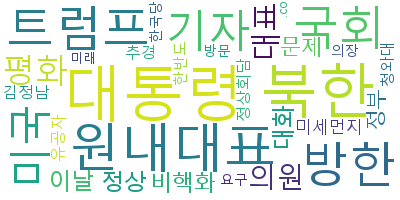

In [231]:
wc.generate_from_frequencies(fd)
wc.to_image()

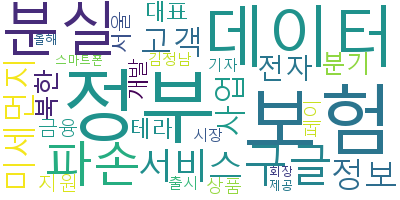

In [235]:
wc.generate_from_frequencies(fd)
wc.to_image()

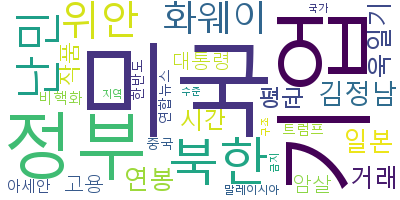

In [239]:
wc.generate_from_frequencies(fd)
wc.to_image()

In [ ]:
#http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/